In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import  silhouette_score

### 1. Load Data: 

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.shape

(8068, 11)

### 2. EDA:

1. General Info: 

In [4]:
df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [5]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


__Comments:__
    
- minimum & 2nd quartile work experience is 0 (probably young people) (<b style='color:red'>have to investigate</b>)

In [6]:
df.describe(include='O')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


2. Univariate Analysis:

i. Segmentations:

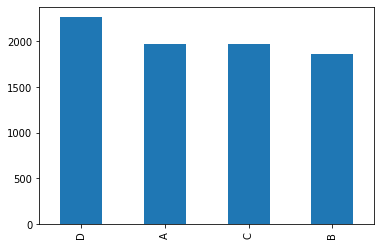

In [7]:
df.Segmentation.value_counts().plot.bar()

ii. Gender, Ever Married, Graduated, Profession, Spending Score & Var1:

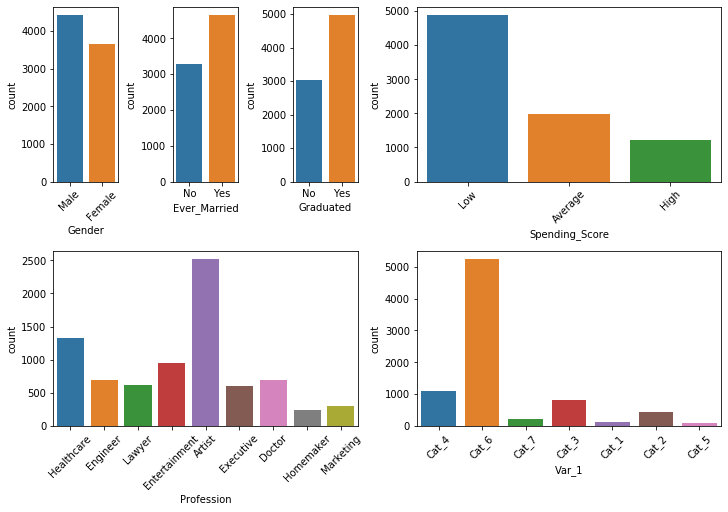

In [8]:
fig3 = plt.figure(constrained_layout=True, figsize=(10,7))
gs = fig3.add_gridspec(2, 6)

f1_ax1 = fig3.add_subplot(gs[0, 0])
#1_ax1.set_title('Countplot of Gender')
chart = sns.countplot(df['Gender'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

f2_ax2 = fig3.add_subplot(gs[0, 1])
#2_ax2.set_title('Countplot of Ever Married')
sns.countplot(df['Ever_Married'])

f3_ax3 = fig3.add_subplot(gs[0, 2])
#f3_ax3.set_title('Countplot of Graduated')
sns.countplot(df['Graduated'])


f4_ax4 = fig3.add_subplot(gs[1, :3])
#f3_ax3.set_title('Countplot of Graduated')
chart = sns.countplot(df['Profession'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


f5_ax5 = fig3.add_subplot(gs[1, 3:])
#f3_ax3.set_title('Countplot of Graduated')
chart = sns.countplot(df['Var_1'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

f6_ax6 = fig3.add_subplot(gs[0, 3:])
#6_ax6.set_title('Graduated')
chart = sns.countplot(df['Spending_Score'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

iii. Age,Work_Experience & Family_Size

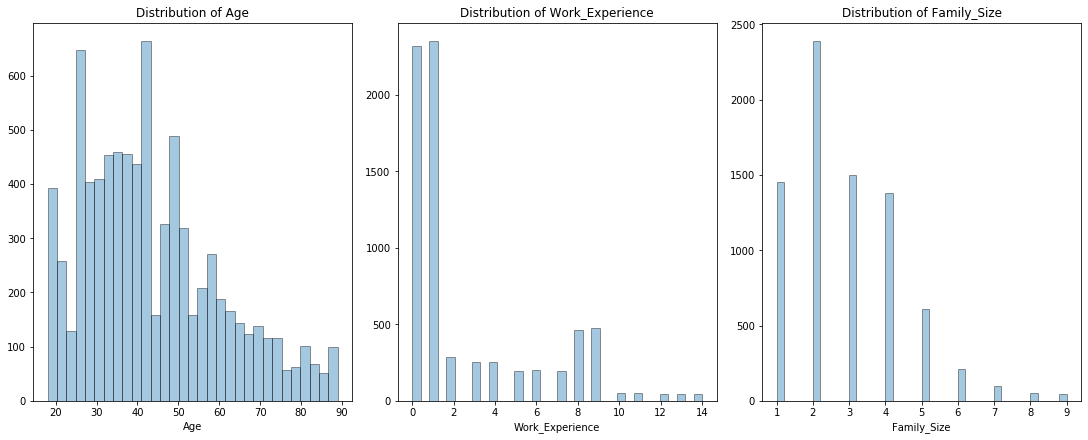

In [9]:
num_var = ['Age','Work_Experience','Family_Size']
fig3 = plt.figure(constrained_layout=True, figsize=(15,6))
gs = fig3.add_gridspec(1, 3)


for i,col in enumerate(num_var):
    f1_ax1 = fig3.add_subplot(gs[0, i])
    #1_ax1.set_title('Countplot of Gender')
    sns.distplot(df[df[col].notnull()][col], kde=False, hist_kws={'edgecolor':'black'}, ax =f1_ax1)

    f1_ax1.set_title('Distribution of '+col)
    


3. Multivariate Analysis:

i. Pairplot:

/home/sehan/Desktop/Jupyter notebook/jupyter_env/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/sehan/Desktop/Jupyter notebook/jupyter_env/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/sehan/Desktop/Jupyter notebook/jupyter_env/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


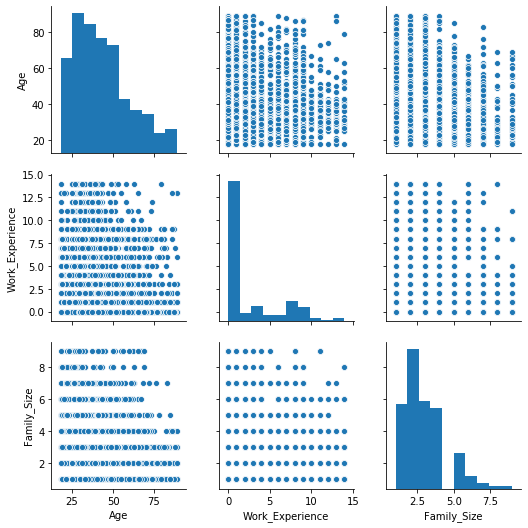

In [10]:
sns.pairplot(df.drop(['ID'],axis=1), size=2.5);

ii. Spending w.r.t age. 

In [11]:
df.groupby(by=['Spending_Score'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Spending_Score,,,,,,,,
Average,1974.0,46.868288,11.308729,18.0,38.0,46.5,55.0,89.0
High,1216.0,57.777138,17.743685,18.0,43.0,57.5,72.0,89.0
Low,4878.0,38.523165,15.861773,18.0,27.0,35.0,46.0,89.0


__Observations:__

- Young people in low segment; Middled age in avaerage segment & older age people in high segment. 
- Seems to be a good discrimatory feature for segmentation. 

ii. Spending score w.r.t gender:

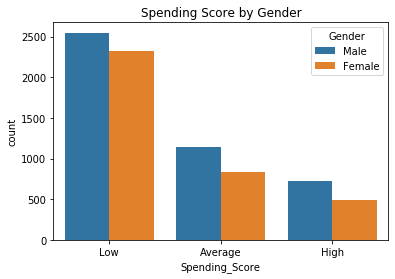

In [12]:
sns.countplot(df['Spending_Score'], hue=df['Gender'])
plt.title('Spending Score by Gender')
plt.show()

iv. Spending Score w.r.t work experience &  family size 

In [13]:
df.groupby(by=['Spending_Score'])['Family_Size','Work_Experience'].describe()

Family_Size                                               \
                     count      mean       std  min  25%  50%  75%  max   
Spending_Score                                                            
Average             1943.0  3.104992  1.234290  1.0  2.0  3.0  4.0  9.0   
High                1187.0  2.990733  1.356049  1.0  2.0  2.0  4.0  9.0   
Low                 4603.0  2.706279  1.664420  1.0  1.0  2.0  4.0  9.0   

               Work_Experience                                                
                         count      mean       std  min  25%  50%  75%   max  
Spending_Score                                                                
Average                 1765.0  2.518414  3.237627  0.0  0.0  1.0  4.0  14.0  
High                    1069.0  2.103835  2.999606  0.0  0.0  1.0  2.0  14.0  
Low                     4405.0  2.821566  3.547580  0.0  0.0  1.0  5.0  14.0

v. Age with working Experience:

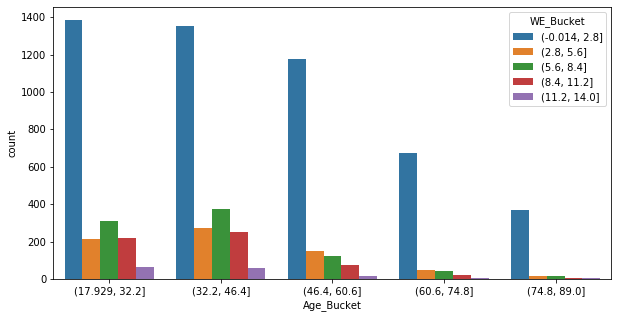

In [14]:
df['Age_Bucket'] = pd.cut(df['Age'],5)
df['WE_Bucket'] = pd.cut(df['Work_Experience'],5)
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['Age_Bucket'], hue=df['WE_Bucket'])

vi. Age, Working Experience & spending Score: 

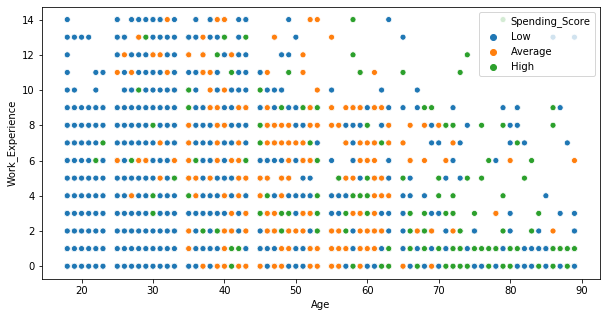

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(df['Age'], df['Work_Experience'], hue=df['Spending_Score'])

__Observations__:

- Low working experience + crossed 50 years interesting spending more!
- Young + (high working experience or low working experience) won't spending more. 


vii: Education with spending: 

In [16]:
pd.crosstab(df['Graduated'], df['Spending_Score'])

Spending_Score,Average,High,Low
Graduated,,,
No,503,425,2094
Yes,1450,780,2738


In [17]:
graduated = df[df['Graduated']=='Yes']
not_graduated = df[df['Graduated']=='No']

res1 = (graduated['Spending_Score'].value_counts()/len(graduated))*100
res2 = (not_graduated['Spending_Score'].value_counts()/len(graduated))*100

print('Graduated:\n ',res1, '\n Not Graduated:\n ',res2)

Graduated:
  Low        55.112721
Average    29.186795
High       15.700483
Name: Spending_Score, dtype: float64 
 Not Graduated:
  Low        42.149758
Average    10.124799
High        8.554750
Name: Spending_Score, dtype: float64


__Observations__:

- graduates spend more! maybe due to highly paid.

viii: Education, Age &  spending: 

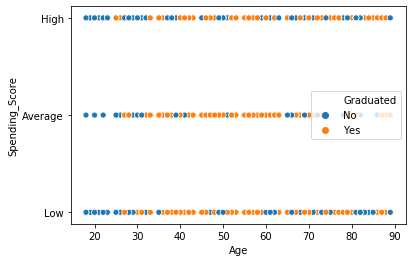

In [18]:
sns.scatterplot(df['Age'], df['Spending_Score'], hue=df['Graduated'])

ix: Profession with Spending: 

In [19]:
pd.crosstab(df['Profession'], df['Spending_Score']).apply(lambda r: (r/r.sum())*100, axis=1)

Spending_Score,Average,High,Low
Profession,,,
Artist,40.182830,9.618442,50.198728
Doctor,25.726744,4.505814,69.767442
Engineer,31.616595,8.583691,59.799714
Entertainment,33.614331,4.847208,61.538462
Executive,12.520868,66.444073,21.035058
Healthcare,3.153153,3.378378,93.468468
Homemaker,24.390244,10.569106,65.040650
Lawyer,2.889246,52.006421,45.104334
Marketing,5.821918,11.301370,82.876712


__Observations__:

- Executives & lawyers have majority in high segment. 

x. Working experience with Profession. 

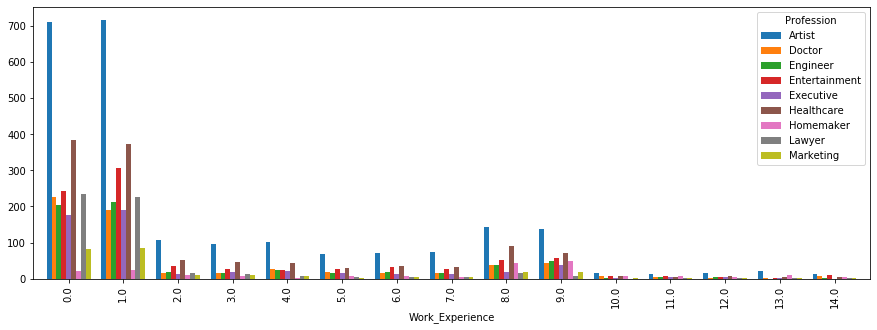

In [20]:
pd.crosstab(df['Work_Experience'], df['Profession']).plot.bar(figsize=(15,5), width=0.8)

xi: marriage with Spending: 

In [21]:
pd.crosstab(df['Ever_Married'], df['Spending_Score']).apply(lambda x: (x/x.sum())*100, axis=1)

Spending_Score,Average,High,Low
Ever_Married,,,
No,0.000000,0.000000,100.000000
Yes,41.718716,25.328451,32.952832


__Observations:__

- Marriage make you spend more!

xii: category with Spending: 

In [22]:
pd.crosstab(df['Var_1'], df['Spending_Score']).apply(lambda x: (x/x.sum())*100, axis=1)

Spending_Score,Average,High,Low
Var_1,,,
Cat_1,21.052632,14.285714,64.661654
Cat_2,22.985782,10.189573,66.824645
Cat_3,23.965937,8.880779,67.153285
Cat_4,27.640037,10.651974,61.707989
Cat_5,23.529412,8.235294,68.235294
Cat_6,24.150439,17.621229,58.228331
Cat_7,24.137931,12.315271,63.546798


xiii: gender, working experience with age: 

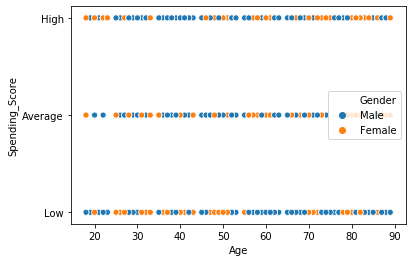

In [23]:
sns.scatterplot(df['Age'], df['Spending_Score'], hue=df['Gender'])

xiv: family size with Spending Score:

In [24]:
df.groupby(by=['Spending_Score'])['Family_Size'].describe()

,count,mean,std,min,25%,50%,75%,max
Spending_Score,,,,,,,,
Average,1943.0,3.104992,1.234290,1.0,2.0,3.0,4.0,9.0
High,1187.0,2.990733,1.356049,1.0,2.0,2.0,4.0,9.0
Low,4603.0,2.706279,1.664420,1.0,1.0,2.0,4.0,9.0


xv: high spending score segment: 

In [25]:
high = df[df['Spending_Score']=='High']

In [26]:
high = high.drop(['ID','Spending_Score'],axis=1)

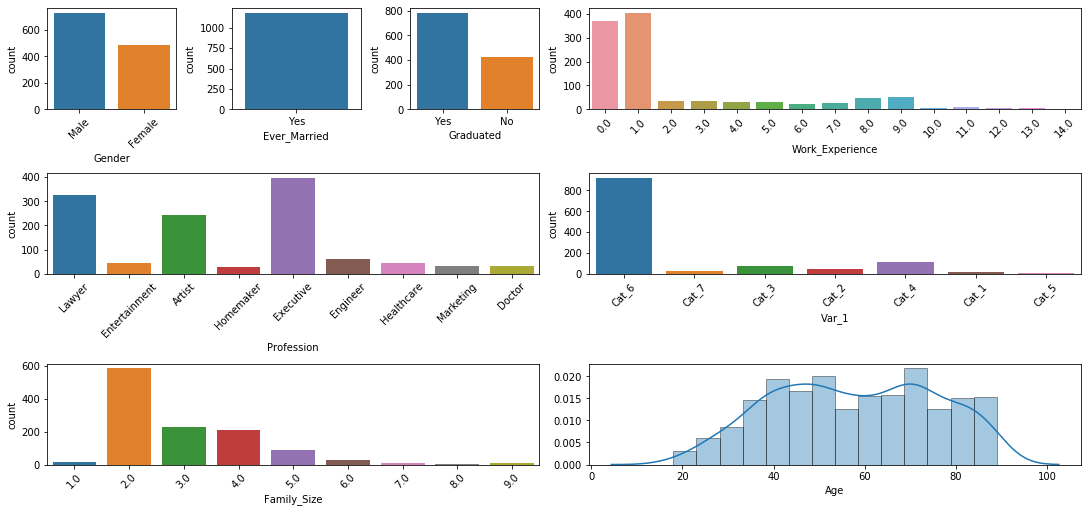

In [27]:
fig3 = plt.figure(constrained_layout=True, figsize=(15,7))
gs = fig3.add_gridspec(3, 6)

f1_ax1 = fig3.add_subplot(gs[0, 0])
#1_ax1.set_title('Countplot of Gender')
chart = sns.countplot(high['Gender'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

f2_ax2 = fig3.add_subplot(gs[0, 1])
#2_ax2.set_title('Countplot of Ever Married')
sns.countplot(high['Ever_Married'])

f3_ax3 = fig3.add_subplot(gs[0, 2])
#f3_ax3.set_title('Countplot of Graduated')
sns.countplot(high['Graduated'])


f4_ax4 = fig3.add_subplot(gs[1, :3])
#f3_ax3.set_title('Countplot of Graduated')
chart = sns.countplot(high['Profession'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


f5_ax5 = fig3.add_subplot(gs[1, 3:])
#f3_ax3.set_title('Countplot of Graduated')
chart = sns.countplot(high['Var_1'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

f6_ax6 = fig3.add_subplot(gs[0, 3:])
#6_ax6.set_title('Graduated')
chart = sns.countplot(high['Work_Experience'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

f7_ax7 = fig3.add_subplot(gs[2, :3])
#6_ax6.set_title('Graduated')
chart = sns.countplot(high['Family_Size'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

f8_ax8 = fig3.add_subplot(gs[2, 3:])
#6_ax6.set_title('Graduated')
chart = sns.distplot(high['Age'],hist_kws={'edgecolor':'black'})
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


plt.show()

xvi: low spending score segment: 

In [28]:
low = df[df['Spending_Score']=='Low']

In [29]:
low = low.drop(['ID','Spending_Score'],axis=1)

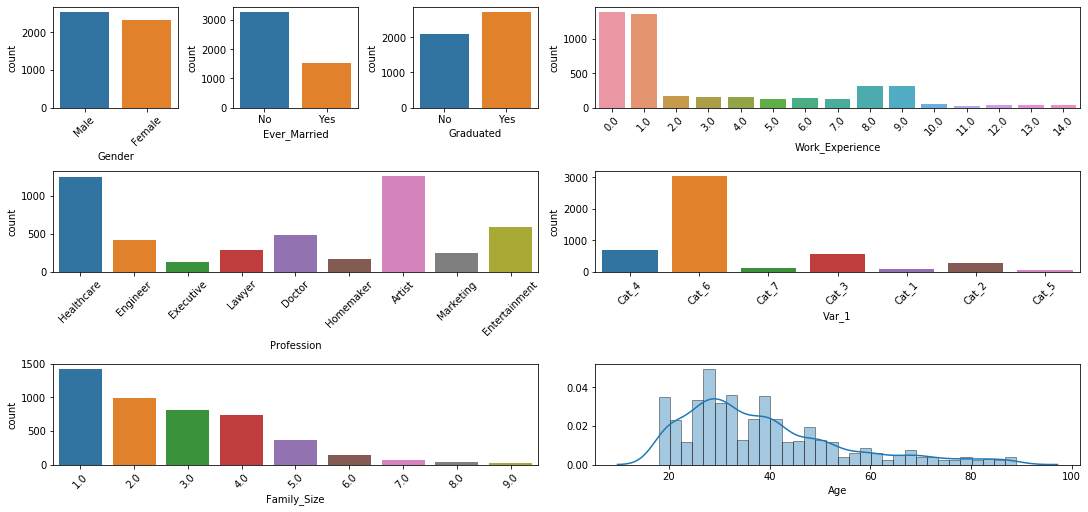

In [30]:
fig3 = plt.figure(constrained_layout=True, figsize=(15,7))
gs = fig3.add_gridspec(3, 6)

f1_ax1 = fig3.add_subplot(gs[0, 0])
#1_ax1.set_title('Countplot of Gender')
chart = sns.countplot(low['Gender'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

f2_ax2 = fig3.add_subplot(gs[0, 1])
#2_ax2.set_title('Countplot of Ever Married')
sns.countplot(low['Ever_Married'])

f3_ax3 = fig3.add_subplot(gs[0, 2])
#f3_ax3.set_title('Countplot of Graduated')
sns.countplot(low['Graduated'])


f4_ax4 = fig3.add_subplot(gs[1, :3])
#f3_ax3.set_title('Countplot of Graduated')
chart = sns.countplot(low['Profession'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


f5_ax5 = fig3.add_subplot(gs[1, 3:])
#f3_ax3.set_title('Countplot of Graduated')
chart = sns.countplot(low['Var_1'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

f6_ax6 = fig3.add_subplot(gs[0, 3:])
#6_ax6.set_title('Graduated')
chart = sns.countplot(low['Work_Experience'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

f7_ax7 = fig3.add_subplot(gs[2, :3])
#6_ax6.set_title('Graduated')
chart = sns.countplot(low['Family_Size'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


f8_ax8 = fig3.add_subplot(gs[2, 3:])
#6_ax6.set_title('Graduated')
chart = sns.distplot(low['Age'],hist_kws={'edgecolor':'black'})
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


plt.show()

xvii: Average spending score segment: 

In [31]:
avg = df[df['Spending_Score']=='Average']

In [32]:
avg = avg.drop(['ID','Spending_Score'],axis=1)

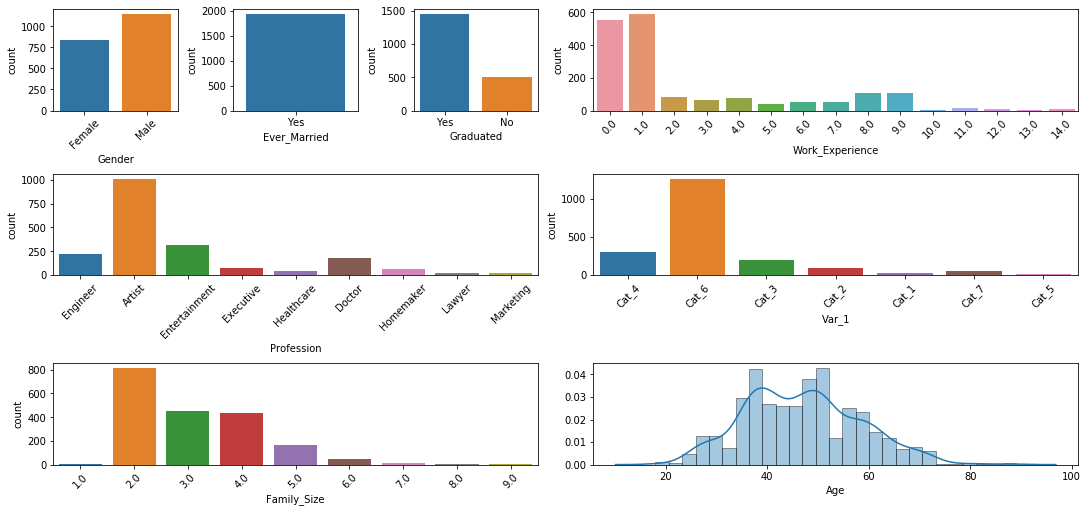

In [33]:
fig3 = plt.figure(constrained_layout=True, figsize=(15,7))
gs = fig3.add_gridspec(3, 6)

f1_ax1 = fig3.add_subplot(gs[0, 0])
#1_ax1.set_title('Countplot of Gender')
chart = sns.countplot(avg['Gender'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

f2_ax2 = fig3.add_subplot(gs[0, 1])
#2_ax2.set_title('Countplot of Ever Married')
sns.countplot(avg['Ever_Married'])

f3_ax3 = fig3.add_subplot(gs[0, 2])
#f3_ax3.set_title('Countplot of Graduated')
sns.countplot(avg['Graduated'])


f4_ax4 = fig3.add_subplot(gs[1, :3])
#f3_ax3.set_title('Countplot of Graduated')
chart = sns.countplot(avg['Profession'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


f5_ax5 = fig3.add_subplot(gs[1, 3:])
#f3_ax3.set_title('Countplot of Graduated')
chart = sns.countplot(avg['Var_1'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

f6_ax6 = fig3.add_subplot(gs[0, 3:])
#6_ax6.set_title('Graduated')
chart = sns.countplot(avg['Work_Experience'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

f7_ax7 = fig3.add_subplot(gs[2, :3])
#6_ax6.set_title('Graduated')
chart = sns.countplot(avg['Family_Size'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


f8_ax8 = fig3.add_subplot(gs[2, 3:])
#6_ax6.set_title('Graduated')
chart = sns.distplot(avg['Age'],hist_kws={'edgecolor':'black'})
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


plt.show()

xviii: Spending pattern of experienced working clients: 

In [34]:
from bokeh.models import FactorRange
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

x_axis = df['Work_Experience'].value_counts().index.tolist()
x_axis = [str(round(x)) for x in x_axis]

fruits = x_axis#str(round(df['Work_Experience'].value_counts().index.tolist()))
years = ['high', 'low', 'average']

data = {'Work Experience' : fruits,
        'high'   : high.groupby(by=['Work_Experience']).size().tolist(),
        'low'   : low.groupby(by=['Work_Experience']).size().tolist(),
        'average'   : avg.groupby(by=['Work_Experience']).size().tolist()}

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (fruit, year) for fruit in fruits for year in years ]
counts = sum(zip(data['high'], data['low'], data['average']), ()) # like an hstack
source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x),plot_width=1500, plot_height=500, title="Work Experience & Spending Score")

p.vbar(x='x', top='counts', width=0.9, source=source)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None


show(p)

### 3. Clustering: 

In [35]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import  silhouette_score
from tqdm import tqdm

def finding_num_cluster(X, min_clusters =2, max_clusters =30):
    silh = []
    inertia = []
    clusters = range(min_clusters,max_clusters)
    for n in tqdm(clusters):

        model = KMeans(n_clusters = n, random_state=42)
        preds = model.fit_predict(X)

        silhouette_avg = silhouette_score(X, preds)

        silh.append(silhouette_avg)
        inertia.append(model.inertia_)

    fig, (ax1,ax2) = plt.subplots(2,1, sharex=False, figsize=(8,7))
    ax1.plot(clusters, silh,marker="o")
    ax1.set_ylabel("Silhoutte Score")
    ax1.set_xlabel('number of clusters')
    ax2.plot(clusters, inertia, marker="o")
    ax2.set_ylabel("Inertia (SSE)")
    ax2.set_xlabel("number of clusters")
    plt.show()


In [36]:
selected_features = df[['Ever_Married', 'Age', 'Graduated', 'Profession', 'Spending_Score']]
selected_features = pd.get_dummies(selected_features)
selected_features = selected_features.drop(['Profession_Artist', 'Profession_Doctor', 'Profession_Engineer',
       'Profession_Entertainment',
       'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Marketing'],axis=1)

selected_features['others'] = selected_features['Profession_Executive'] + selected_features['Profession_Lawyer']

In [37]:
selected_features['others'] = selected_features['others'].apply(lambda x: 0 if x > 0 else 1 )

In [38]:
selected_features = selected_features.fillna(0)

100%|██████████| 28/28 [00:48<00:00,  1.72s/it]


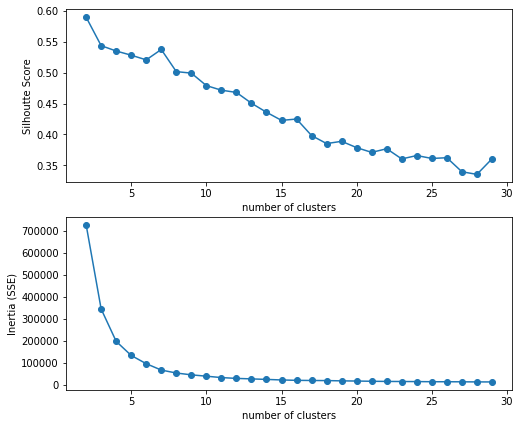

In [39]:
finding_num_cluster(selected_features)

In [40]:
from sklearn.preprocessing import StandardScaler

def perform_scaling(df):
    scaler = StandardScaler()
    std_arr = scaler.fit_transform(df)
    df_std = pd.DataFrame(std_arr, index=df.index, columns= df.columns)
    return df_std, scaler


In [41]:
from sklearn.preprocessing import StandardScaler

def perform_inverse_scaling(df, scaler):
    std_arr = scaler.inverse_transform(df)
    df_std = pd.DataFrame(std_arr, index=df.index, columns= df.columns)
    return df_std, scaler


In [42]:
profile_std_main, scaler_main = perform_scaling(selected_features)

In [43]:
profile_std_main

,Age,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Executive,Profession_Lawyer,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,others
0,-1.284623,1.206653,-1.164311,1.29219,-1.265931,-0.283193,-0.289276,-0.569144,-0.421268,0.808676,0.422491
1,-0.327151,-0.828738,0.858877,-0.77388,0.789933,-0.283193,-0.289276,1.757024,-0.421268,-1.236590,0.422491
2,1.408268,-0.828738,0.858877,-0.77388,0.789933,-0.283193,-0.289276,-0.569144,-0.421268,0.808676,0.422491
3,1.408268,-0.828738,0.858877,-0.77388,0.789933,-0.283193,3.456912,-0.569144,2.373788,-1.236590,-2.366916
4,-0.207467,-0.828738,0.858877,-0.77388,0.789933,-0.283193,-0.289276,-0.569144,2.373788,-1.236590,0.422491
...,...,...,...,...,...,...,...,...,...,...,...
8063,-1.284623,1.206653,-1.164311,1.29219,-1.265931,-0.283193,-0.289276,-0.569144,-0.421268,0.808676,0.422491
8064,-0.506677,1.206653,-1.164311,1.29219,-1.265931,3.531163,-0.289276,-0.569144,-0.421268,0.808676,-2.366916
8065,-0.626361,1.206653,-1.164311,-0.77388,0.789933,-0.283193,-0.289276,-0.569144,-0.421268,0.808676,0.422491
8066,-0.985413,1.206653,-1.164311,-0.77388,0.789933,-0.283193,-0.289276,-0.569144,-0.421268,0.808676,0.422491


100%|██████████| 28/28 [00:48<00:00,  1.74s/it]


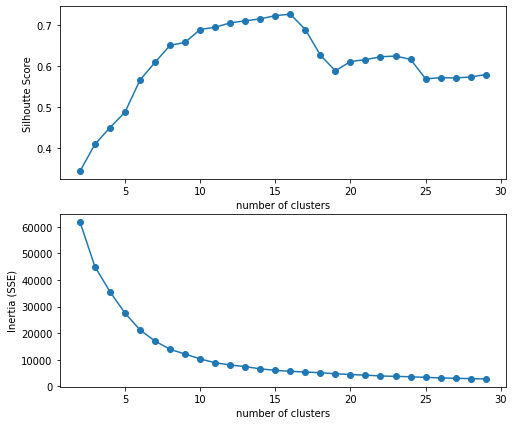

In [44]:
finding_num_cluster(profile_std_main)

100%|██████████| 28/28 [00:46<00:00,  1.67s/it]


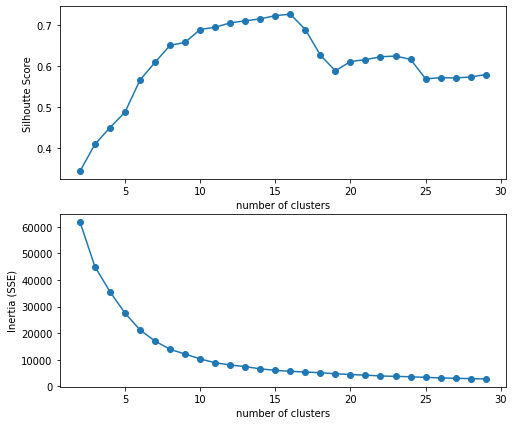

In [45]:
finding_num_cluster(profile_std_main)

In [46]:
model = KMeans(n_clusters = 9, random_state=42)
preds = model.fit_predict(profile_std_main)

In [47]:
org_data, scaler = perform_inverse_scaling(profile_std_main, scaler_main)

In [48]:
org_data = org_data.apply(lambda x: abs(round(x)) )
org_data['cluster'] = preds

In [49]:
org_data

,Age,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Executive,Profession_Lawyer,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,others,cluster
0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
1,38.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,67.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2
3,67.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4
4,40.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
8064,35.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3
8065,33.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5
8066,27.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5


### 4. Cluster Analysis

i. Age: 

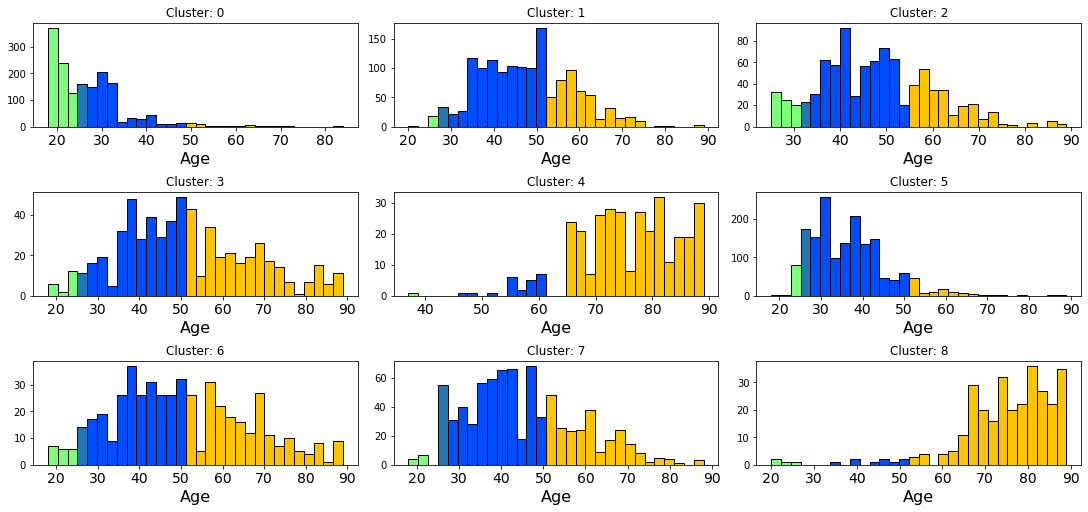

In [50]:
fig3 = plt.figure(constrained_layout=True, figsize=(15,7))
gs = fig3.add_gridspec(3, 6)

no_of_clusters = len(org_data['cluster'].unique())
start = 0 
end = 2
row = 0
for cls in range(0,no_of_clusters):
    f1_ax1 = fig3.add_subplot(gs[row, start:end])
    N, bins, patches = f1_ax1.hist(org_data[org_data['cluster']==cls]['Age'], 30,edgecolor='black')
    cmap = plt.get_cmap('jet')
    low = cmap(0.5)
    medium =cmap(0.2)
    high = cmap(0.7)

    for i in range(0,3):
        patches[i].set_facecolor(low)
    for i in range(4,20):
        patches[i].set_facecolor(medium)
    for i in range(14,30):
        patches[i].set_facecolor(high)

    plt.xlabel("Age", fontsize=16)  
    plt.xticks(fontsize=14) 
    f1_ax1.set_title('Cluster: '+ str(cls))
    start = end 
    end = end + 2
    if cls in [2,5]:
        row += 1
        start = 0 
        end = 2


plt.show()

__Observations:__

- Cluster 0 is a group of young people (probably less working experience). The most probable age is 20 and probability of age 20 is the highest in this cluster (cluster 0) compared to all clusters.  
- Cluster 1, Cluster 2, Cluster 3, cluster 6 & cluster 7 have similar age distribution. (roughly 40 is the most probable age). 
- Cluster 4 & cluster 8 have similar age distribution. most of them are above 60 years old. (probable have more working experience & high spending score). 
- Cluster 5 is bit different from rest of the clusters. (most probable age between 25-30 years) 

ii. Married: 

In [51]:
org_data.loc[:, 'Married'] = pd.get_dummies(org_data.iloc[:,1:3]).idxmax(1)

In [52]:
org_data['Married'] = org_data['Married'].apply(lambda x: x.split('_')[-1])

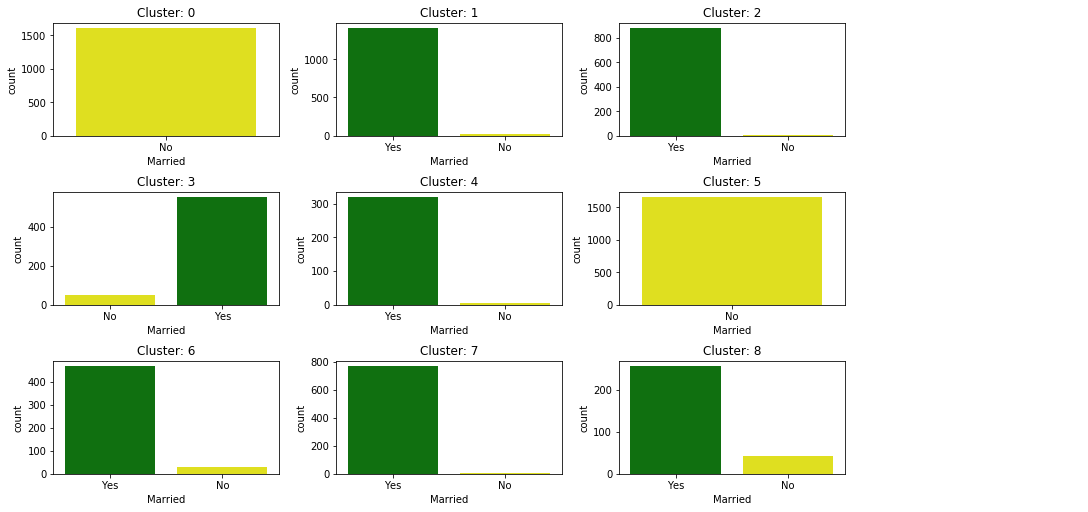

In [53]:
fig3 = plt.figure(constrained_layout=True, figsize=(15,7))
gs = fig3.add_gridspec(3, 4)

no_of_clusters = len(org_data['cluster'].unique())
start = 0 
end = 1
row = 0
for cls in range(0,no_of_clusters):
    f1_ax1 = fig3.add_subplot(gs[row, start:end])
    charts = sns.countplot(org_data[org_data['cluster']==cls]['Married'], palette={'Yes':'green', 'No':'yellow'})
    
    f1_ax1.set_title('Cluster: '+ str(cls))
    start = end 
    end = end + 1
    if cls in [2,5]:
        row += 1
        start = 0 
        end = 1


plt.show()

__Observations:__

- Cluster 0 & cluster 5 are clusters of young population & not a single instance of married in these clusters. (they probably be spending less as per EDA). 
- Rest of the clusters have significant majority of married instances.

iii. Education: 

In [54]:
org_data.loc[:, 'Graduated'] = pd.get_dummies(org_data.iloc[:,3:5]).idxmax(1)

In [55]:
org_data['Graduated'] = org_data['Graduated'].apply(lambda x: x.split('_')[-1])

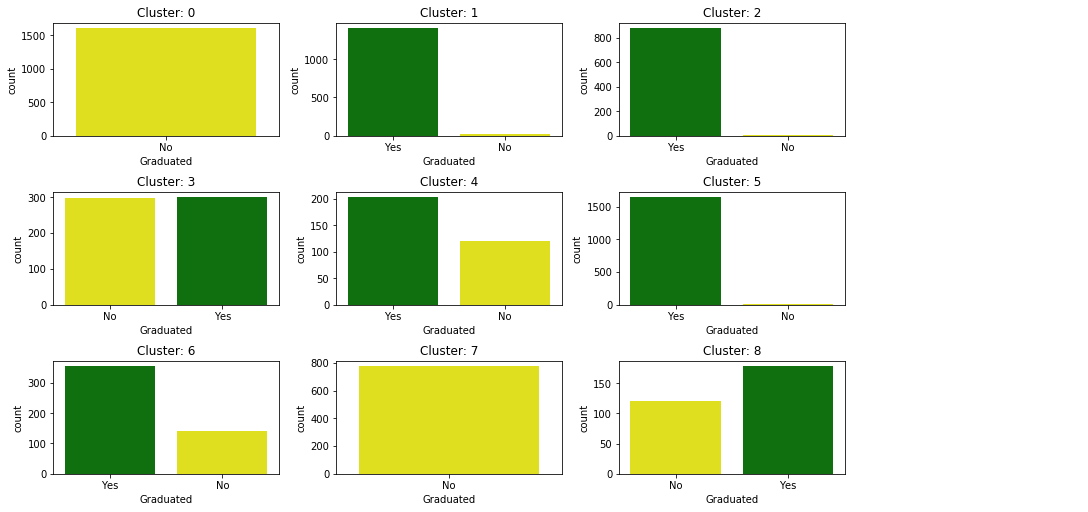

In [56]:
fig3 = plt.figure(constrained_layout=True, figsize=(15,7))
gs = fig3.add_gridspec(3, 4)

no_of_clusters = len(org_data['cluster'].unique())
start = 0 
end = 1
row = 0
for cls in range(0,no_of_clusters):
    f1_ax1 = fig3.add_subplot(gs[row, start:end])
    charts = sns.countplot(org_data[org_data['cluster']==cls]['Graduated'], palette={'Yes':'green', 'No':'yellow'})
    
    f1_ax1.set_title('Cluster: '+ str(cls))
    start = end 
    end = end + 1
    if cls in [2,5]:
        row += 1
        start = 0 
        end = 1


plt.show()

__Observations:__

- Cluster 0 & cluster 7 are the clusters of population with no graduation. In face cluster 0 have a young population it make sense there (maybe they are too young to be graduated) but cluster 7 have a balanced distribution which is bit surprising as well it means never graduated from any university. 
- Cluster 3 is unique in which there is almost equal percentage graduates and non-graduates. 
- Cluster 1, 2 & 5 are similar almost all are graduates. 
- cluster 4, 6 & 8 are similar where roughly 70-75% graduates and 25-30% non-graduates. 

iv. Profession: 

In [57]:
org_data.loc[:, 'Profession'] = pd.get_dummies(org_data.loc[:,['Profession_Executive', 'Profession_Lawyer','others']]).idxmax(1)

In [58]:
org_data['Profession'] = org_data['Profession'].apply(lambda x: x.split('_')[-1])

In [59]:
org_data.Profession.unique()

array(['others', 'Lawyer', 'Executive'], dtype=object)

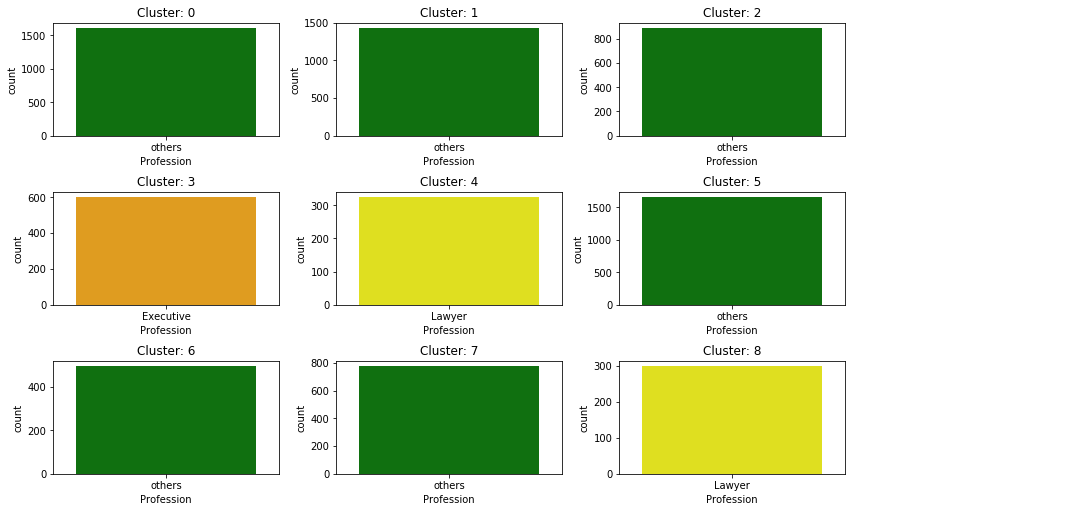

In [60]:
fig3 = plt.figure(constrained_layout=True, figsize=(15,7))
gs = fig3.add_gridspec(3, 4)

no_of_clusters = len(org_data['cluster'].unique())
start = 0 
end = 1
row = 0
for cls in range(0,no_of_clusters):
    f1_ax1 = fig3.add_subplot(gs[row, start:end])
    charts = sns.countplot(org_data[org_data['cluster']==cls]['Profession'], palette={'others':'green', 'Lawyer':'yellow','Executive':'orange'})
    
    f1_ax1.set_title('Cluster: '+ str(cls))
    start = end 
    end = end + 1
    if cls in [2,5]:
        row += 1
        start = 0 
        end = 1


plt.show()

__Observations:__

- Cluster 0,1,2,5,6 and 7 are from others category of profession. 
- Cluster 3 are purely executives (probably spending more as per previous EDA)
- Cluster 4 & 8 are purely lawyers. (probably spending more as per previous EDA)

v. Spending: 

In [61]:
org_data.columns

Index(['Age', 'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No',
       'Graduated_Yes', 'Profession_Executive', 'Profession_Lawyer',
       'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low',
       'others', 'cluster', 'Married', 'Graduated', 'Profession'],
      dtype='object')

In [62]:
org_data.loc[:, 'Spending'] = pd.get_dummies(org_data.loc[:,['Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low']]).idxmax(1)

In [63]:
org_data['Spending'] = org_data['Spending'].apply(lambda x: x.split('_')[-1])

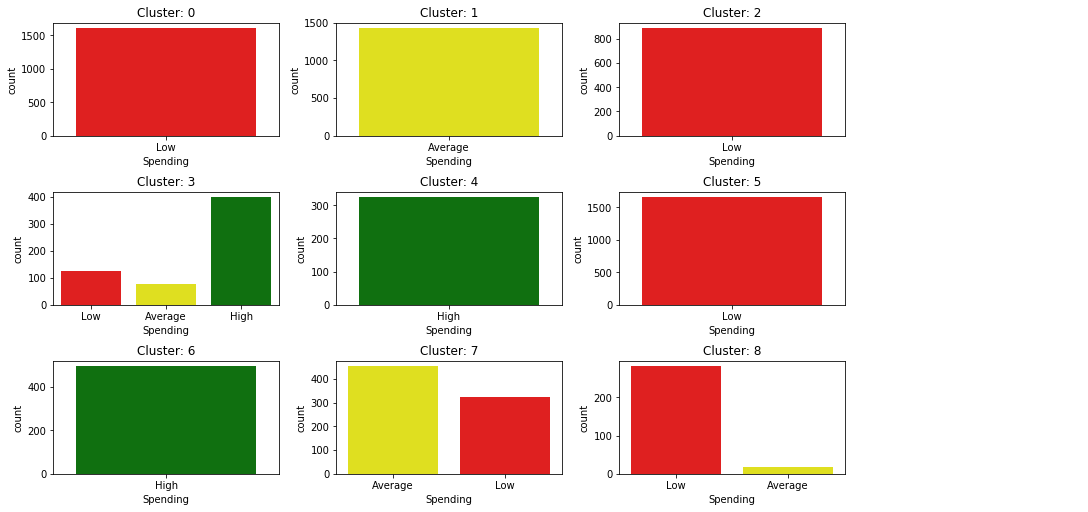

In [64]:
fig3 = plt.figure(constrained_layout=True, figsize=(15,7))
gs = fig3.add_gridspec(3, 4)

no_of_clusters = len(org_data['cluster'].unique())
start = 0 
end = 1
row = 0
for cls in range(0,no_of_clusters):
    f1_ax1 = fig3.add_subplot(gs[row, start:end])
    charts = sns.countplot(org_data[org_data['cluster']==cls]['Spending'], palette={'Low':'red', 'Average':'yellow','High':'green'})
    
    f1_ax1.set_title('Cluster: '+ str(cls))
    start = end 
    end = end + 1
    if cls in [2,5]:
        row += 1
        start = 0 
        end = 1


plt.show()

__Observations:__

- As expected cluster 0 and 5 are low spending population (young individuals). Cluster 2 is also similar to the cluster 0 and 5 (which was unexpected).
- Cluster 4 & 6 are populations which high spending (it was expected for cluster 4 because they are all lawyers but not for cluster 6 which have other professions). 
- Cluster 3, Executives have majority of high spending but low & average spending score also exist.
- Cluster 7 have more average spending than low spending whereas cluster 8 has more low spending than average. 

- Complete view. 

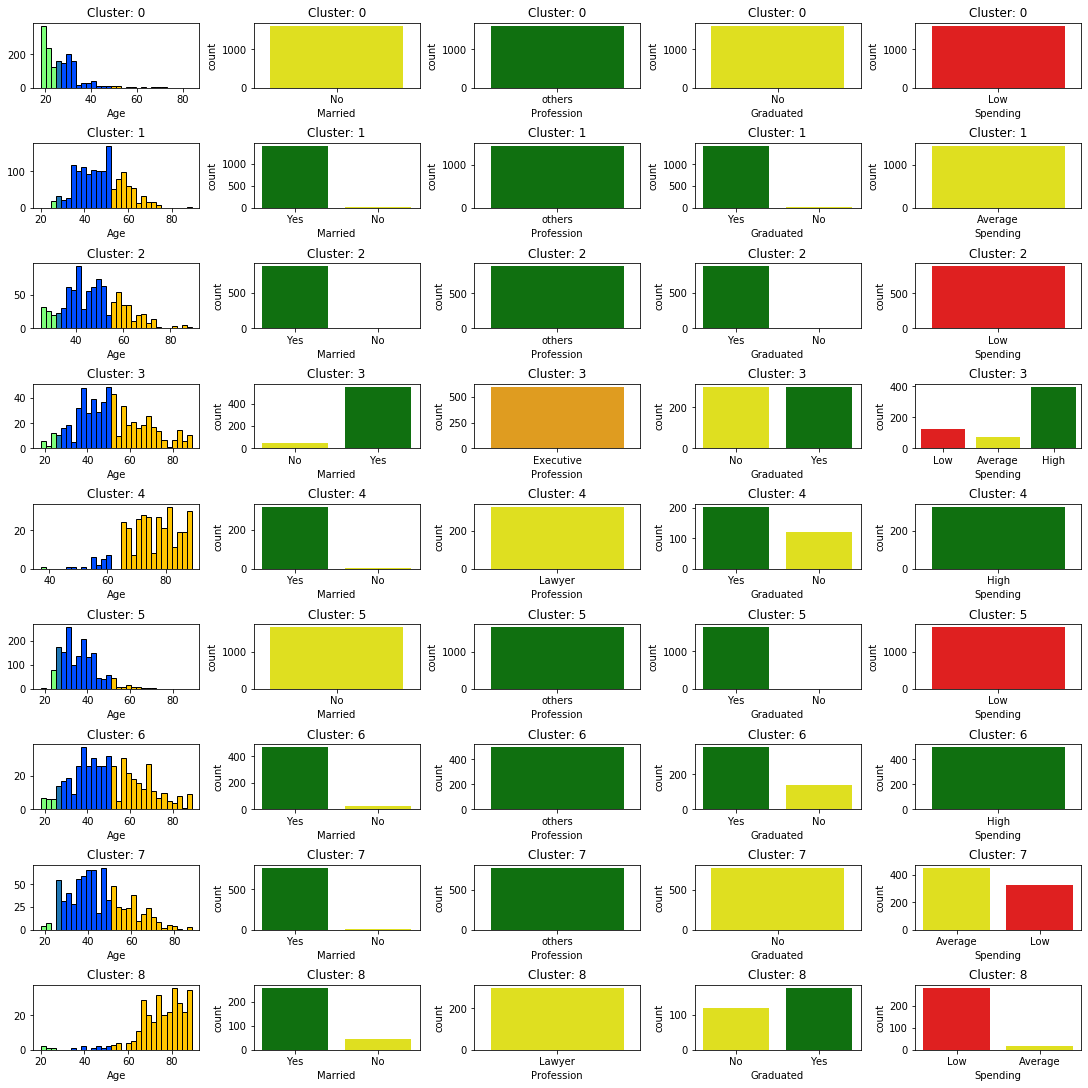

In [65]:
fig3 = plt.figure(constrained_layout=True, figsize=(15,15))
gs = fig3.add_gridspec(9, 10)

no_of_clusters = len(org_data['cluster'].unique())
start = 0 
end = 1
row = 0
for cls in range(0,no_of_clusters):
    # i. Age: #
    f1_ax1 = fig3.add_subplot(gs[cls, :2])
    N, bins, patches = f1_ax1.hist(org_data[org_data['cluster']==cls]['Age'], 30,edgecolor='black')
    cmap = plt.get_cmap('jet')
    low = cmap(0.5)
    medium =cmap(0.2)
    high = cmap(0.7)

    for i in range(0,3):
        patches[i].set_facecolor(low)
    for i in range(4,20):
        patches[i].set_facecolor(medium)
    for i in range(14,30):
        patches[i].set_facecolor(high)

    plt.xlabel("Age", fontsize=10)  
    plt.xticks(fontsize=10) 
    f1_ax1.set_title('Cluster: '+ str(cls))
    
    # ii. Marital Status # 
    f1_ax1 = fig3.add_subplot(gs[cls, 2:4])
    charts = sns.countplot(org_data[org_data['cluster']==cls]['Married'], palette={'Yes':'green', 'No':'yellow'})
    
    f1_ax1.set_title('Cluster: '+ str(cls))
    
    # iii. Profession #
    f1_ax1 = fig3.add_subplot(gs[cls, 4:6])
    charts = sns.countplot(org_data[org_data['cluster']==cls]['Profession'], palette={'others':'green', 'Lawyer':'yellow','Executive':'orange'})
    f1_ax1.set_title('Cluster: '+ str(cls))
    
    # iv. Education # 
    f1_ax1 = fig3.add_subplot(gs[cls, 6:8])
    charts = sns.countplot(org_data[org_data['cluster']==cls]['Graduated'], palette={'Yes':'green', 'No':'yellow'})
    f1_ax1.set_title('Cluster: '+ str(cls))
    
    # v. Spending Score #
    f1_ax1 = fig3.add_subplot(gs[cls, 8:10])
    charts = sns.countplot(org_data[org_data['cluster']==cls]['Spending'], palette={'Low':'red', 'Average':'yellow','High':'green'})
    f1_ax1.set_title('Cluster: '+ str(cls))
    
plt.show(block=False)

In [68]:
fig3 = plt.figure(constrained_layout=True, figsize=(15,15))
gs = fig3.add_gridspec(9, 12)

no_of_clusters = len(org_data['cluster'].unique())
start = 0 
end = 1
row = 0
for cls in range(0,no_of_clusters):
    # i. Age: #
#     f1_ax1 = fig3.add_subplot(gs[cls, :2])
#     N, bins, patches = f1_ax1.hist(org_data[org_data['cluster']==cls]['Age'], 30,edgecolor='black')
#     cmap = plt.get_cmap('jet')
#     low = cmap(0.5)
#     medium =cmap(0.2)
#     high = cmap(0.7)

#     for i in range(0,3):
#         patches[i].set_facecolor(low)
#     for i in range(4,20):
#         patches[i].set_facecolor(medium)
#     for i in range(14,30):
#         patches[i].set_facecolor(high)

#     plt.xlabel("Age", fontsize=10)  
#     plt.xticks(fontsize=10) 
#     f1_ax1.set_title('Cluster: '+ str(cls))
    
#     # ii. Marital Status # 
#     f1_ax1 = fig3.add_subplot(gs[cls, 2:4])
#     charts = sns.countplot(org_data[org_data['cluster']==cls]['Married'], palette={'Yes':'green', 'No':'yellow'})
    
#     f1_ax1.set_title('Cluster: '+ str(cls))
    
#     # iii. Profession #
#     f1_ax1 = fig3.add_subplot(gs[cls, 4:6])
#     charts = sns.countplot(org_data[org_data['cluster']==cls]['Profession'], palette={'others':'green', 'Lawyer':'yellow','Executive':'orange'})
#     f1_ax1.set_title('Cluster: '+ str(cls))
    
#     # iv. Education # 
#     f1_ax1 = fig3.add_subplot(gs[cls, 6:8])
#     charts = sns.countplot(org_data[org_data['cluster']==cls]['Graduated'], palette={'Yes':'green', 'No':'yellow'})
#     f1_ax1.set_title('Cluster: '+ str(cls))
    
#     # v. Spending Score #
#     f1_ax1 = fig3.add_subplot(gs[cls, 8:10])
#     charts = sns.countplot(org_data[org_data['cluster']==cls]['Spending'], palette={'Low':'red', 'Average':'yellow','High':'green'})
#     f1_ax1.set_title('Cluster: '+ str(cls))
    
     # vi. Segmentation  #
    f1_ax1 = fig3.add_subplot(gs[cls, 10:12])
    charts = sns.countplot(org_data[org_data['cluster']==cls]['Segmentation'], palette={'A':'red', 'B':'yellow','C':'green', 'D':'grey'})
    f1_ax1.set_title('Cluster: '+ str(cls))
    
    
plt.show(block=False)

KeyboardInterrupt: 

In [67]:
org_data['Segmentation'] = df['Segmentation']

In [ ]:
sns.countplot(org_data['Segmentation'], hue=org_data['cluster'])

In [70]:
org_data.groupby(by=['cluster','Segmentation']).size()

cluster  Segmentation
0        A                240
         B                128
         C                161
         D               1076
1        A                189
         B                405
         C                794
         D                 41
2        A                277
         B                272
         C                192
         D                147
3        A                125
         B                183
         C                175
         D                116
4        A                 95
         B                103
         C                 95
         D                 31
5        A                548
         B                352
         C                239
         D                516
6        A                105
         B                153
         C                157
         D                 79
7        A                291
         B                207
         C                112
         D                165
8        A        